In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder as le
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
from pylab import rcParams
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import statistics

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

df = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
#renaming unclear variables.
df = df.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [6]:
#summary statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
#finding duplicates
df.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
#finding nulls
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [9]:
#finding outliers
def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

#running created function on quantitative variables

outliers = find_outliers(df, 'Population')
print("number of outliers in Population: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Children')
print("number of outliers in Children: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Age')
print("number of outliers in Age: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Income')
print("number of outliers in Income: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Outage_sec_perweek')
print("number of outliers in Outage_sec_perweek: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Email')
print("number of outliers in Email: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Contacts')
print("number of outliers in Contacts: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Yearly_equip_failure')
print("number of outliers in Yearly_equip_failure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Tenure')
print("number of outliers in Tenure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'MonthlyCharge')
print("number of outliers in MonthlyCharge: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Bandwidth_GB_Year')
print("number of outliers in Bandwidth_GB_Year: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Population: 937
max outlier value: 111850
min outlier value: 31816
number of outliers in Children: 401
max outlier value: 10
min outlier value: 8
number of outliers in Age: 0
max outlier value: nan
min outlier value: nan
number of outliers in Income: 336
max outlier value: 258900.7
min outlier value: 104362.5
number of outliers in Outage_sec_perweek: 76
max outlier value: 21.20723
min outlier value: 0.09974694
number of outliers in Email: 38
max outlier value: 23
min outlier value: 1
number of outliers in Contacts: 8
max outlier value: 7
min outlier value: 6
number of outliers in Yearly_equip_failure: 94
max outlier value: 6
min outlier value: 3
number of outliers in Tenure: 0
max outlier value: nan
min outlier value: nan
number of outliers in MonthlyCharge: 0
max outlier value: nan
min outlier value: nan
number of outliers in Bandwidth_GB_Year: 0
max outlier value: nan
min outlier value: nan


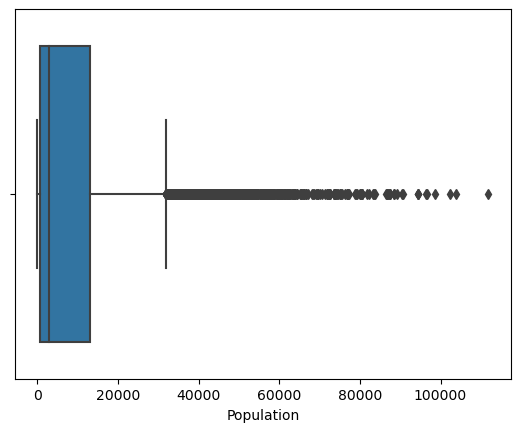

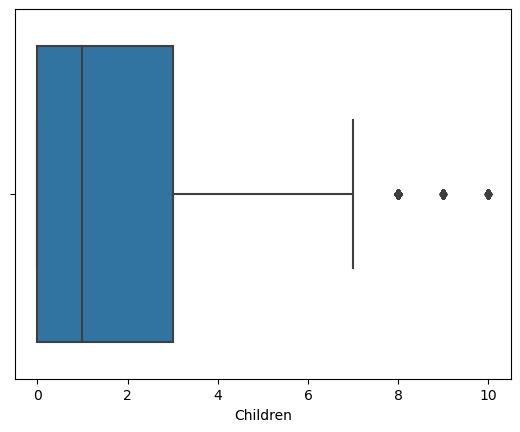

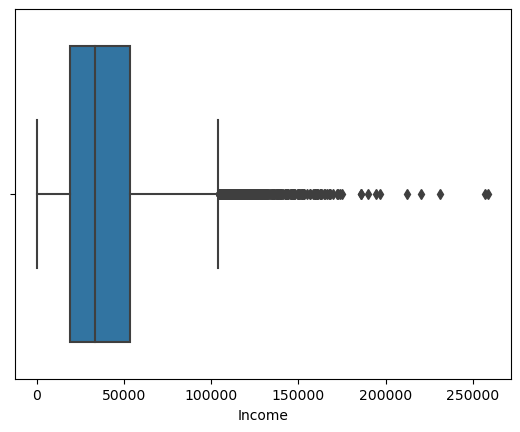

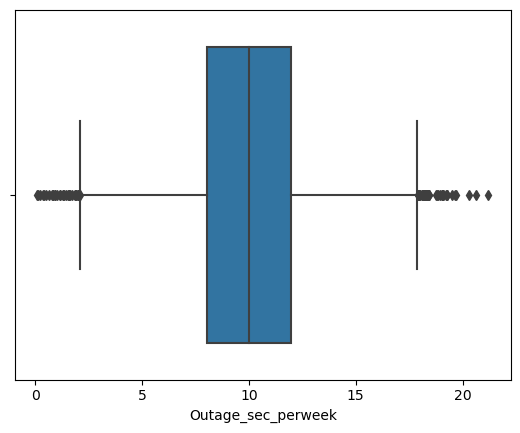

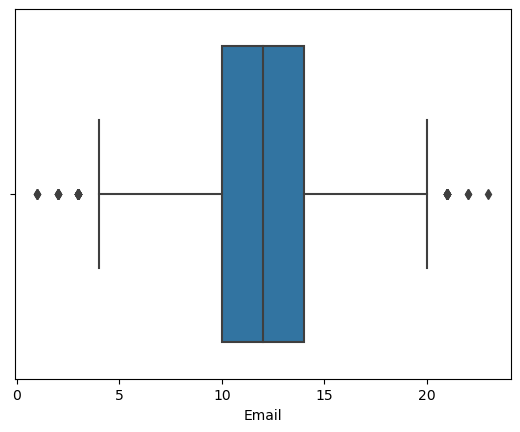

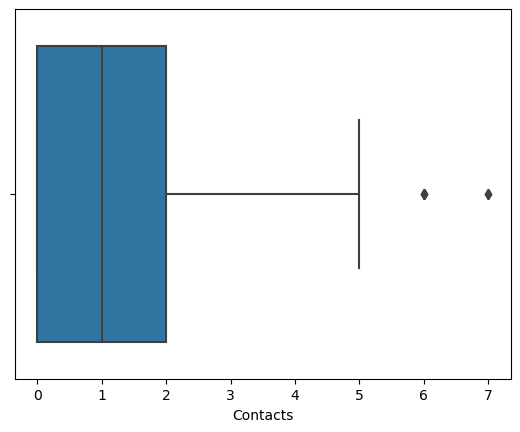

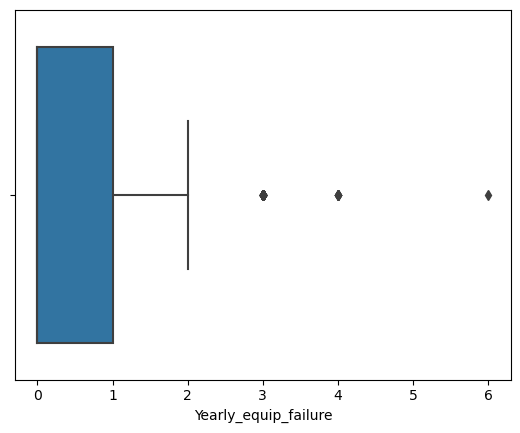

In [10]:
#boxplotting all variables showing outliers

boxplot=sns.boxplot(x='Population',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)
plt.show()
boxplot=sns.boxplot(x='Email',data=df)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=df)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=df)
plt.show()

In [11]:
#treating outliers found.

def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper


lower_pop, upper_pop = find_boundary(df, 'Population' )
print("Upper limit for population is" , upper_pop)
print("Lower limit for population is" , lower_pop)
df.Population = np.where(df.Population > upper_pop, upper_pop,
                               np.where(df.Population < lower_pop, lower_pop, df.Population))

lower_kid, upper_kid = find_boundary(df, 'Children')
print("Upper limit for children is" , upper_kid)
print("Lower limit for children is" , lower_kid)
df.Children = np.where(df.Children > upper_kid, upper_kid,
                               np.where(df.Children < lower_kid, lower_kid, df.Children))

lower_inc, upper_inc = find_boundary(df, 'Income')
print("Upper limit for Income is" , upper_inc)
print("Lower limit for Income is" , lower_inc)
df.Income = np.where(df.Income > upper_inc, upper_inc,
                               np.where(df.Income < lower_inc, lower_inc, df.Income))

lower_osp, upper_osp = find_boundary(df, 'Outage_sec_perweek')
print("Upper limit for Outage_sec_perweek is" , upper_osp)
print("Lower limit for Outage_sec_perweek is" , lower_osp)
df.Outage_sec_perweek = np.where(df.Outage_sec_perweek > upper_osp, upper_osp,
                               np.where(df.Outage_sec_perweek < lower_osp, lower_osp, df.Outage_sec_perweek))

lower_eml, upper_eml = find_boundary(df, 'Email')
print("Upper limit for email is" , upper_eml)
print("Lower limit for email is" , lower_eml)
df.Email = np.where(df.Email > upper_eml, upper_eml,
                               np.where(df.Email < lower_eml, lower_eml, df.Email))

lower_contct, upper_contct = find_boundary(df, 'Contacts')
print("Upper limit for contacts is" , upper_contct)
print("Lower limit for contacts is" , lower_contct)
df.Contacts = np.where(df.Contacts > upper_contct, upper_contct,
                               np.where(df.Contacts < lower_contct, lower_contct, df.Contacts))

lower_yef, upper_yef = find_boundary(df, 'Yearly_equip_failure')
print("Upper limit for Yearly_equip_failure is" , upper_yef)
print("Lower limit for Yearly_equip_failure is" , lower_yef)
df.Yearly_equip_failure = np.where(df.Yearly_equip_failure > upper_yef, upper_yef,
                               np.where(df.Yearly_equip_failure < lower_yef, lower_yef, df.Yearly_equip_failure))



Upper limit for population is 31813.0
Lower limit for population is -17907.0
Upper limit for children is 7.5
Lower limit for children is -4.5
Upper limit for Income is 104278.34875
Lower limit for Income is -31807.46125
Upper limit for Outage_sec_perweek is 17.8963915
Lower limit for Outage_sec_perweek is 2.0913075
Upper limit for email is 20.0
Lower limit for email is 4.0
Upper limit for contacts is 5.0
Lower limit for contacts is -3.0
Upper limit for Yearly_equip_failure is 2.5
Lower limit for Yearly_equip_failure is -1.5


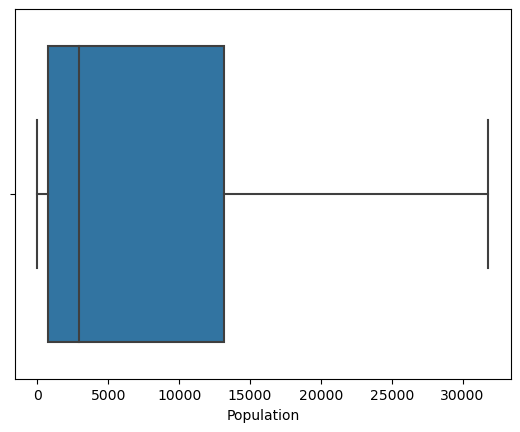

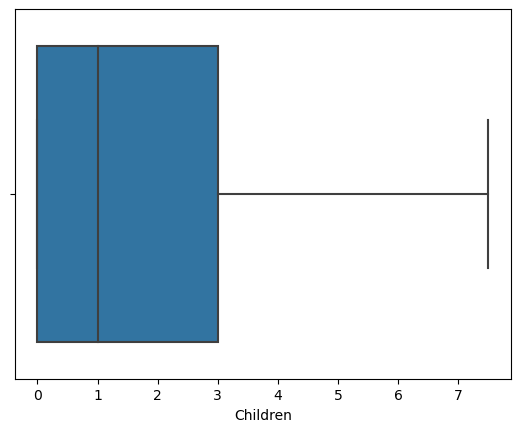

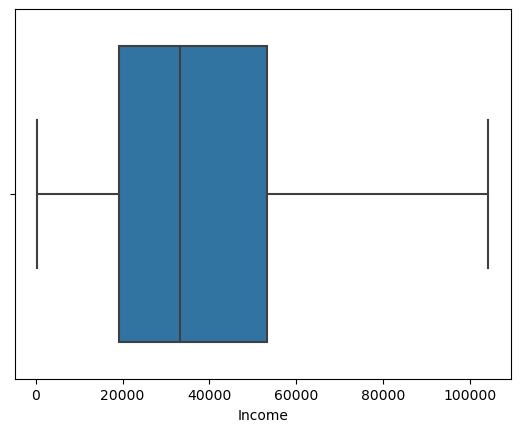

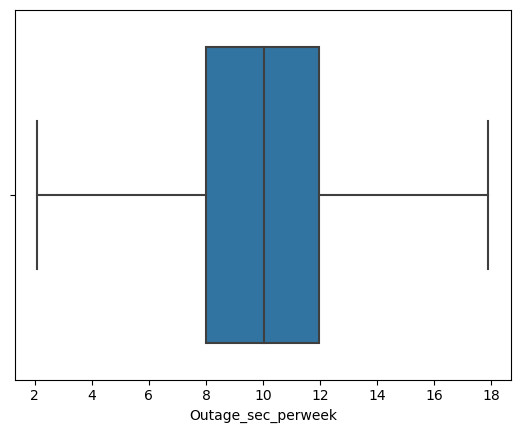

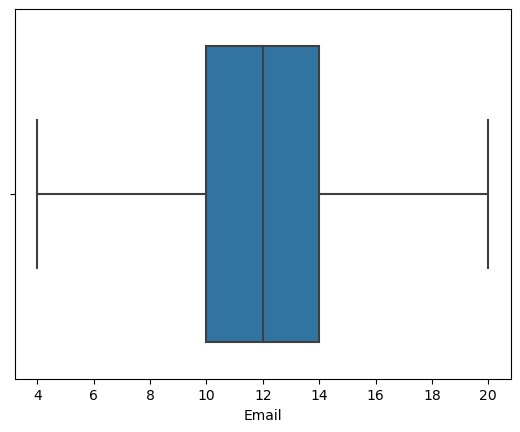

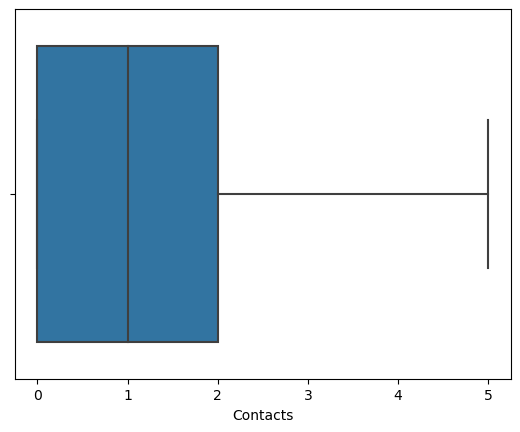

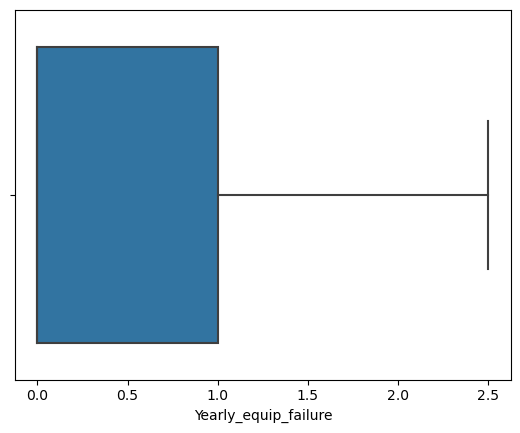

In [12]:
#re-boxplotting all variables showing outliers

boxplot=sns.boxplot(x='Population',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)
plt.show()
boxplot=sns.boxplot(x='Email',data=df)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=df)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=df)
plt.show()

In [13]:
print(f'CaseOrder: {df.CaseOrder.nunique()}')
print(f'Customer_id: {df.Customer_id.nunique()}')
print(f'Interaction: {df.Interaction.nunique()}')
print(f'UID: {df.UID.nunique()}')
print(f'City: {df.City.nunique()}')
print(f'State: {df.State.nunique()}')
print(f'County: {df.County.nunique()}')
print(f'Zip: {df.Zip.nunique()}')
print(f'Lat: {df.Lat.nunique()}')
print(f'Lng: {df.Lng.nunique()}')
print(f'Population: {df.Population.nunique()}')
print(f'Area: {df.Area.nunique()}')
print(f'TimeZone: {df.TimeZone.nunique()}')
print(f'Job: {df.Job.nunique()}')
print(f'Children: {df.Children.nunique()}')
print(f'Age: {df.Age.nunique()}')
print(f'Income: {df.Income.nunique()}')
print(f'Marital: {df.Marital.nunique()}')
print(f'Gender: {df.Gender.nunique()}')
print(f'Churn: {df.Churn.nunique()}')
print(f'Outage_sec_perweek: {df.Outage_sec_perweek.nunique()}')
print(f'Email: {df.Email.nunique()}')
print(f'Contacts: {df.Contacts.nunique()}')
print(f'Yearly_equip_failure: {df.Yearly_equip_failure.nunique()}')
print(f'Techie: {df.Techie.nunique()}')
print(f'Contract: {df.Contract.nunique()}')
print(f'Port_modem: {df.Port_modem.nunique()}')
print(f'Tablet: {df.Tablet.nunique()}')
print(f'InternetService: {df.InternetService.nunique()}')
print(f'Phone: {df.Phone.nunique()}')
print(f'Multiple: {df.Multiple.nunique()}')
print(f'OnlineSecurity: {df.OnlineSecurity.nunique()}')
print(f'OnlineBackup: {df.OnlineBackup.nunique()}')
print(f'DeviceProtection: {df.DeviceProtection.nunique()}')
print(f'TechSupport: {df.TechSupport.nunique()}')
print(f'StreamingTV: {df.StreamingTV.nunique()}')
print(f'StreamingMovies: {df.StreamingMovies.nunique()}')
print(f'PaperlessBilling: {df.PaperlessBilling.nunique()}')
print(f'PaymentMethod: {df.PaymentMethod.nunique()}')
print(f'Tenure: {df.Tenure.nunique()}')
print(f'MonthlyCharge: {df.MonthlyCharge.nunique()}')
print(f'Bandwidth_GB_Year: {df.Bandwidth_GB_Year.nunique()}')
print(f'Timely_Respd: {df.Timely_Respd.nunique()}')
print(f'Timely_Fixes: {df.Timely_Fixes.nunique()}')
print(f'Timely_Replc: {df.Timely_Replc.nunique()}')
print(f'Reliability: {df.Reliability.nunique()}')
print(f'Options: {df.Options.nunique()}')
print(f'Respect_Resp: {df.Respect_Resp.nunique()}')
print(f'Courteous_Exch: {df.Courteous_Exch.nunique()}')
print(f'Evidence_ActListen: {df.Evidence_ActListen.nunique()}')

CaseOrder: 10000
Customer_id: 10000
Interaction: 10000
UID: 10000
City: 6058
State: 52
County: 1620
Zip: 8583
Lat: 8563
Lng: 8630
Population: 5152
Area: 3
TimeZone: 25
Job: 639
Children: 9
Age: 72
Income: 9658
Marital: 5
Gender: 3
Churn: 2
Outage_sec_perweek: 9912
Email: 17
Contacts: 6
Yearly_equip_failure: 4
Techie: 2
Contract: 3
Port_modem: 2
Tablet: 2
InternetService: 3
Phone: 2
Multiple: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
PaymentMethod: 4
Tenure: 9996
MonthlyCharge: 750
Bandwidth_GB_Year: 10000
Timely_Respd: 7
Timely_Fixes: 7
Timely_Replc: 8
Reliability: 7
Options: 7
Respect_Resp: 8
Courteous_Exch: 7
Evidence_ActListen: 8


In [14]:
#dropping categorical variables with high cardinality and unneeded variables
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Email', 'PaperlessBilling',
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job','Bandwidth_GB_Year','Techie', 'Multiple', 'Port_modem', 'Tablet',
       'Phone', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies','Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Contacts              10000 non-null  float64
 10  Yearly_equip_failure  10000 non-null  float64
 11  Contract              10000 non-null  object 
 12  InternetService       10000 non-null  object 
 13  PaymentMethod         10000 non-null  object 
 14  Tenure                10000 non-null  float64
 15  MonthlyCharge       

In [16]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8429.197300,2.038650,53.078400,39005.334061,10.001181,0.993100,0.392300,34.526188,172.624816
std,10611.340884,1.997306,20.698882,25578.172567,2.957834,0.983132,0.612771,26.443063,42.943094
min,0.000000,0.000000,18.000000,348.670000,2.091308,0.000000,0.000000,1.000259,79.978860
25%,738.000000,0.000000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239
50%,2910.500000,1.000000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700
75%,13168.000000,3.000000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725
max,31813.000000,7.500000,89.000000,104278.348750,17.896392,5.000000,2.500000,71.999280,290.160419


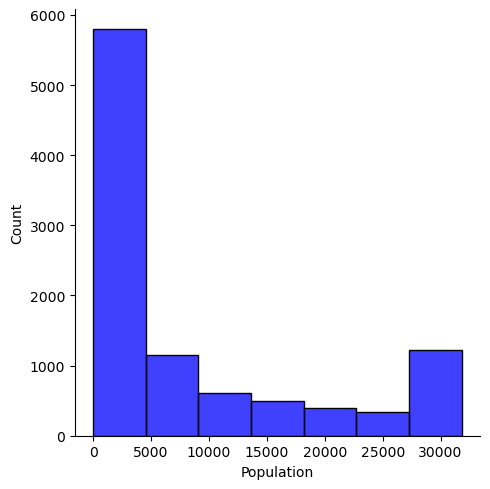

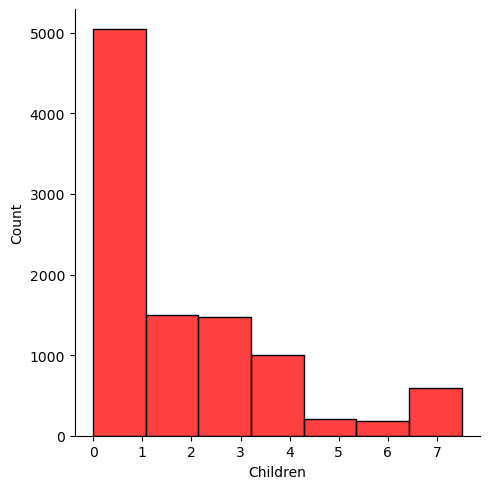

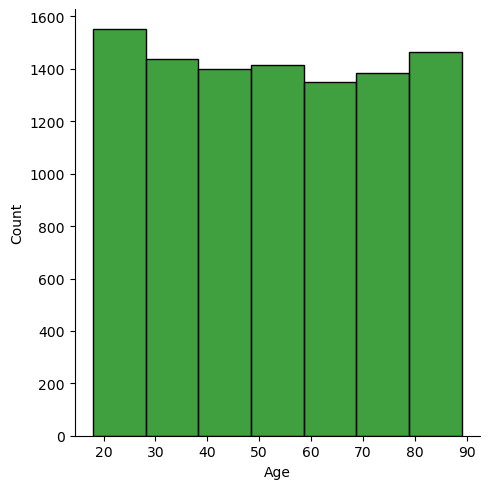

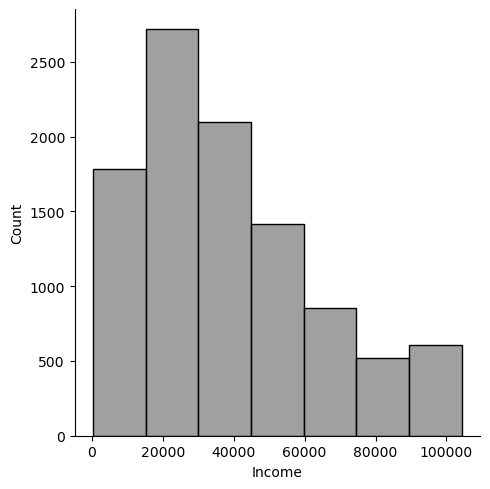

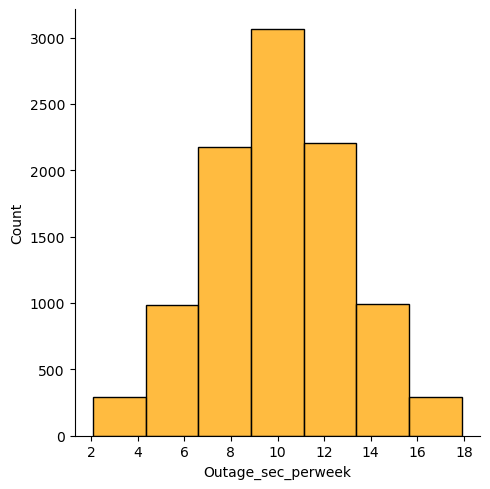

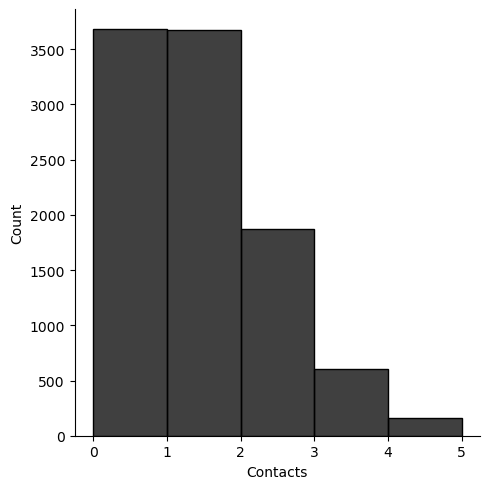

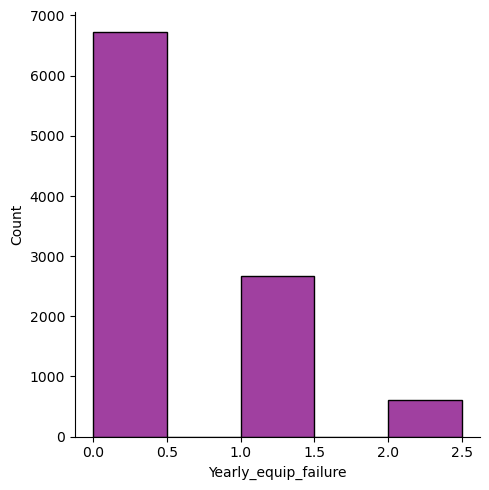

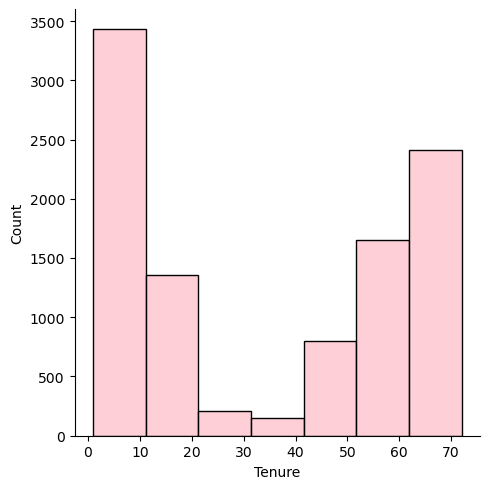

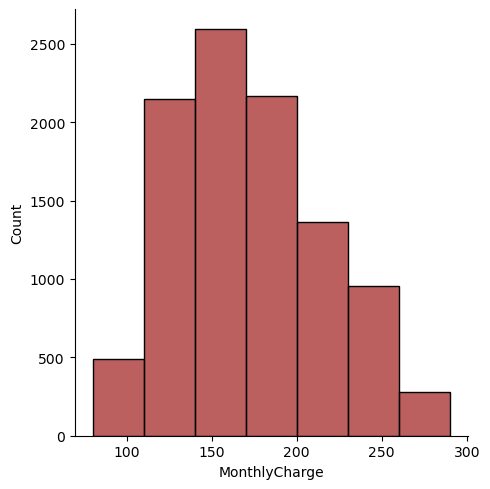

In [17]:
#univariate statistics, via distplots for quantitative explanatory variables

sns.displot(df['Population'], kde=False, color='blue', bins=7)
sns.displot(df['Children'], kde=False, color='red', bins=7)
sns.displot(df['Age'], kde=False, color='green', bins=7)
sns.displot(df['Income'], kde=False, color='gray', bins=7)
sns.displot(df['Outage_sec_perweek'], kde=False, color='orange', bins=7)
sns.displot(df['Contacts'], kde=False, color='black', bins=5)
sns.displot(df['Yearly_equip_failure'], kde=False, color='purple', bins=5)
sns.displot(df['Tenure'], kde=False, color='pink', bins=7)
sns.displot(df['MonthlyCharge'], kde=False, color='brown', bins=7)

<AxesSubplot:xlabel='Area'>

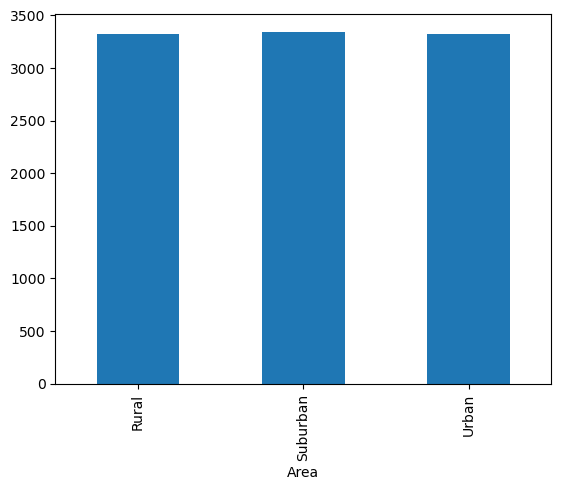

In [18]:
# univariate statistics, via barplots for categorical explanatory variables

groupedArea = df.groupby(by='Area').size()
groupedArea
%matplotlib inline
groupedArea.plot.bar()

<AxesSubplot:xlabel='Marital'>

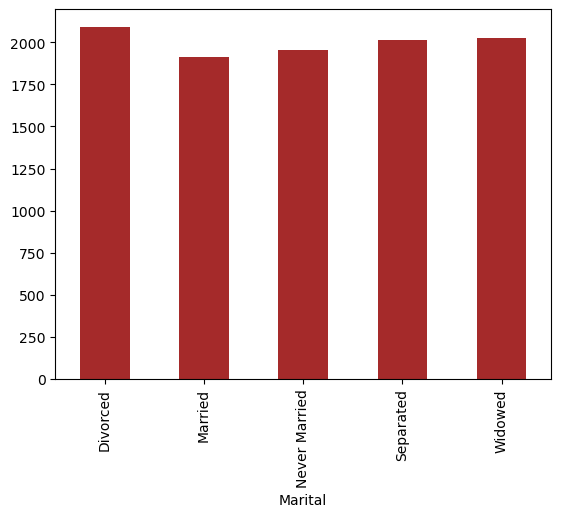

In [19]:
groupedMarital = df.groupby(by='Marital').size()
groupedMarital
%matplotlib inline
groupedMarital.plot.bar(color='brown')

<AxesSubplot:xlabel='Gender'>

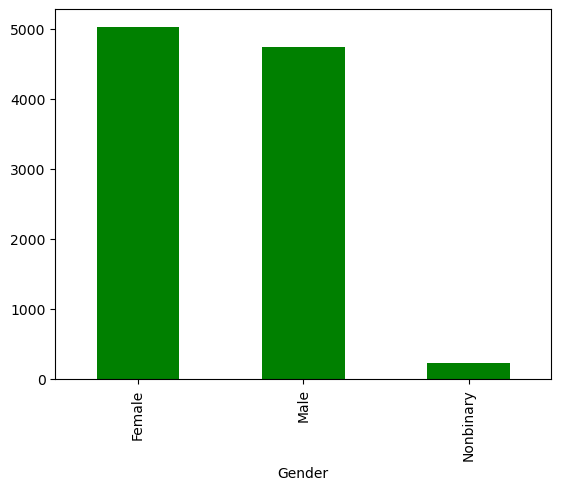

In [20]:
groupedGender = df.groupby(by='Gender').size()
groupedGender
%matplotlib inline
groupedGender.plot.bar(color='green')

<AxesSubplot:xlabel='Contract'>

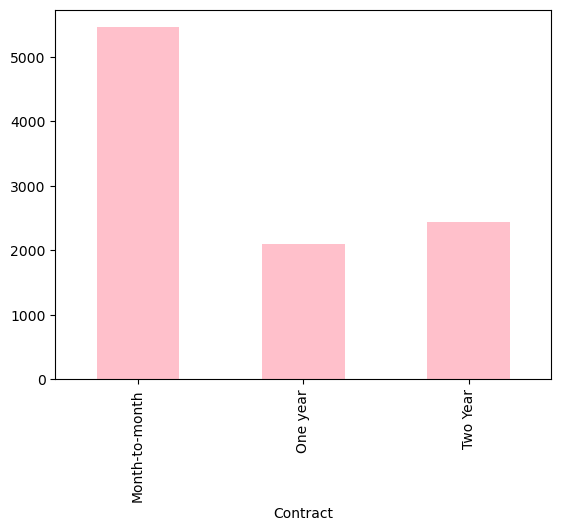

In [21]:
groupedContract = df.groupby(by='Contract').size()
groupedContract
%matplotlib inline
groupedContract.plot.bar(color='pink')

<AxesSubplot:xlabel='InternetService'>

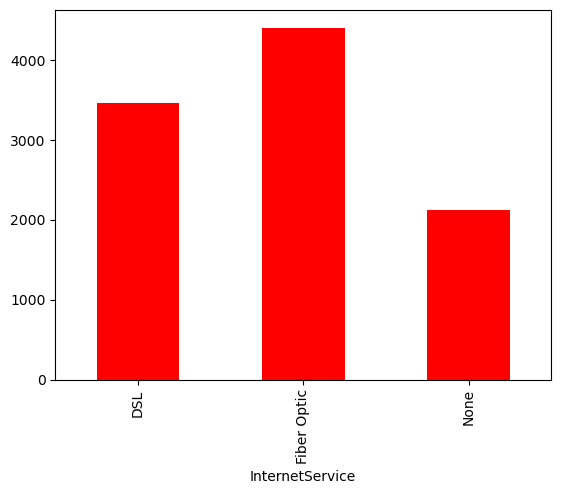

In [22]:
groupedInternetService = df.groupby(by='InternetService').size()
groupedInternetService
%matplotlib inline
groupedInternetService.plot.bar(color='red')

<AxesSubplot:xlabel='PaymentMethod'>

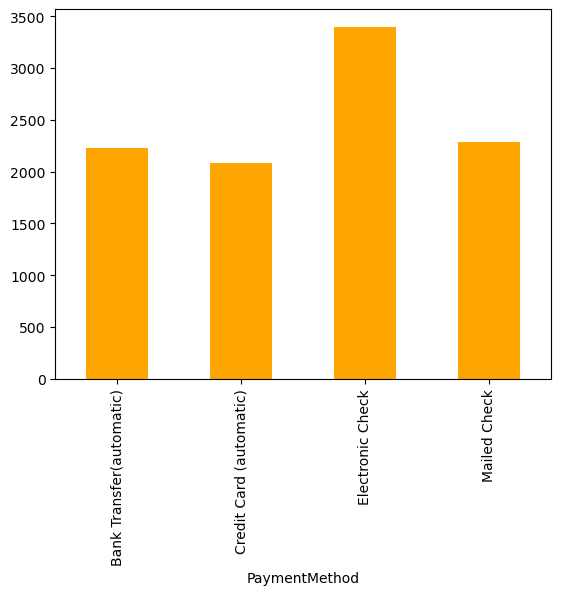

In [23]:
groupedPayment = df.groupby(by='PaymentMethod').size()
groupedPayment
%matplotlib inline
groupedPayment.plot.bar(color='orange')

In [24]:
#bivariate statistics visualizations 
# 2 categorical variables using crosstab table and barplot
 
ca_crosstab=pd.crosstab(index=df['Churn'], columns=df['Area'])
print(ca_crosstab)

Area   Rural  Suburban  Urban
Churn                        
No      2464      2473   2413
Yes      863       873    914


<AxesSubplot:xlabel='Churn'>

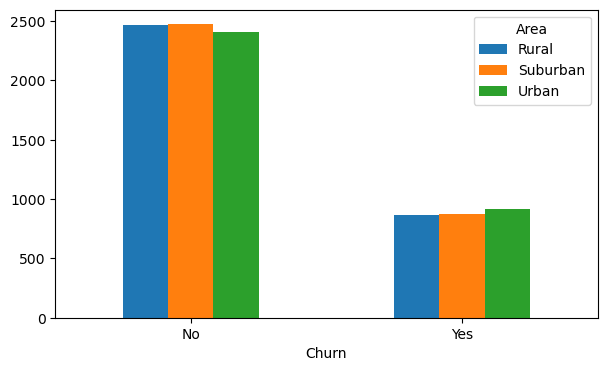

In [25]:
ca_crosstab.plot.bar(figsize=(7,4), rot=0)

In [26]:
cm_crosstab=pd.crosstab(index=df['Churn'], columns=df['Marital'])
print(cm_crosstab)

Marital  Divorced  Married  Never Married  Separated  Widowed
Churn                                                        
No           1539     1418           1468       1454     1471
Yes           553      493            488        560      556


<AxesSubplot:xlabel='Churn'>

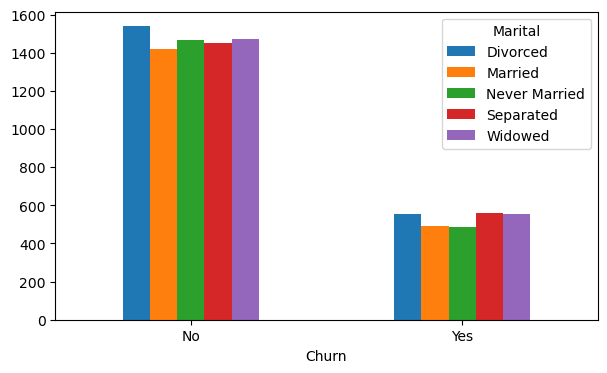

In [27]:
cm_crosstab.plot.bar(figsize=(7,4), rot=0)

In [28]:
cg_crosstab=pd.crosstab(index=df['Churn'], columns=df['Gender'])
print(cg_crosstab)

Gender  Female  Male  Nonbinary
Churn                          
No        3753  3425        172
Yes       1272  1319         59


<AxesSubplot:xlabel='Churn'>

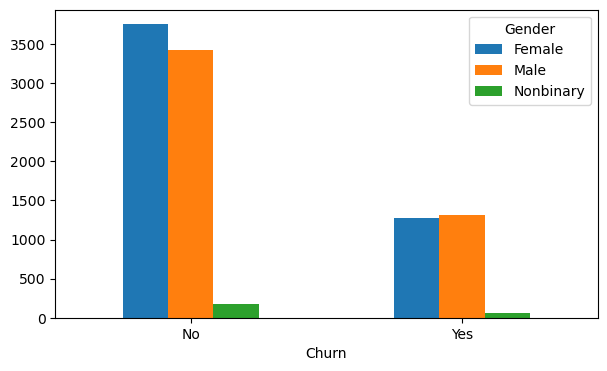

In [29]:
cg_crosstab.plot.bar(figsize=(7,4), rot=0)

In [30]:
cc_crosstab=pd.crosstab(index=df['Churn'], columns=df['Contract'])
print(cc_crosstab)

Contract  Month-to-month  One year  Two Year
Churn                                       
No                  3422      1795      2133
Yes                 2034       307       309


<AxesSubplot:xlabel='Churn'>

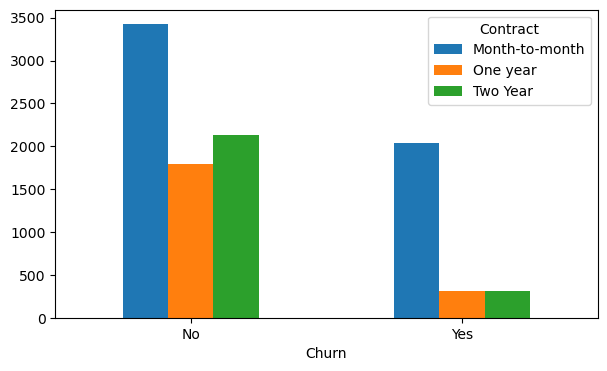

In [31]:
cc_crosstab.plot.bar(figsize=(7,4), rot=0)

In [32]:
ci_crosstab=pd.crosstab(index=df['Churn'], columns=df['InternetService'])
print(ci_crosstab)

InternetService   DSL  Fiber Optic  None
Churn                                   
No               2349         3368  1633
Yes              1114         1040   496


<AxesSubplot:xlabel='Churn'>

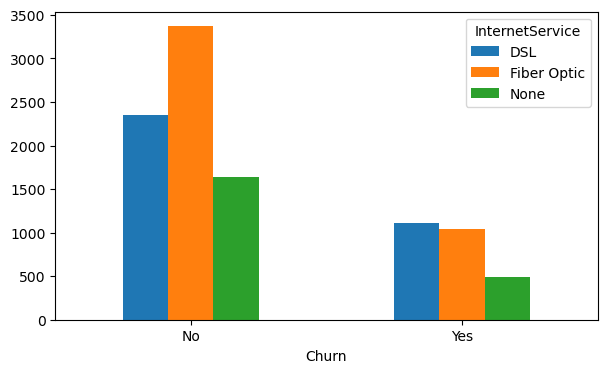

In [33]:
ci_crosstab.plot.bar(figsize=(7,4), rot=0)

In [34]:
cpm_crosstab=pd.crosstab(index=df['Churn'], columns=df['PaymentMethod'])
print(cpm_crosstab)

PaymentMethod  Bank Transfer(automatic)  Credit Card (automatic)  \
Churn                                                              
No                                 1671                     1543   
Yes                                 558                      540   

PaymentMethod  Electronic Check  Mailed Check  
Churn                                          
No                         2435          1701  
Yes                         963           589  


<AxesSubplot:xlabel='Churn'>

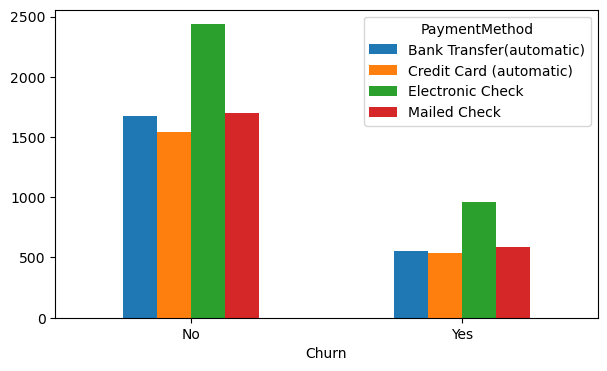

In [35]:
cpm_crosstab.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Churn', ylabel='Population'>

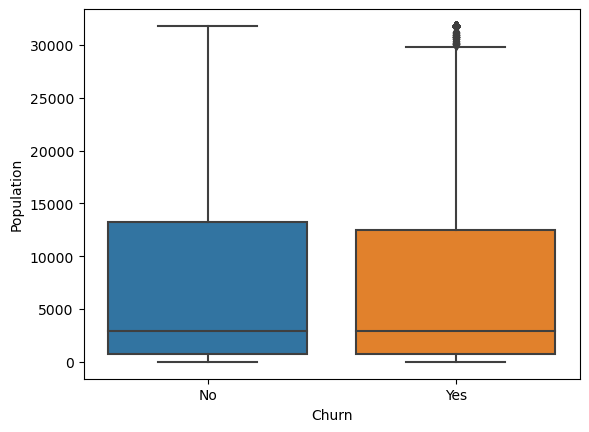

In [36]:
# bivariate statistics of categorical/continuous variable via boxplots

sns.boxplot(data=df, x="Churn", y="Population")

<AxesSubplot:xlabel='Churn', ylabel='Children'>

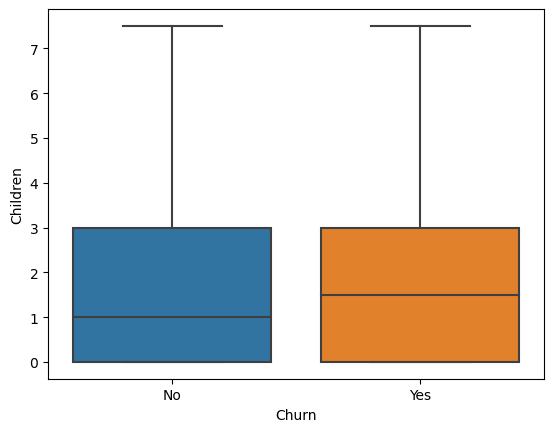

In [37]:
sns.boxplot(data=df, x="Churn", y="Children")

<AxesSubplot:xlabel='Churn', ylabel='Age'>

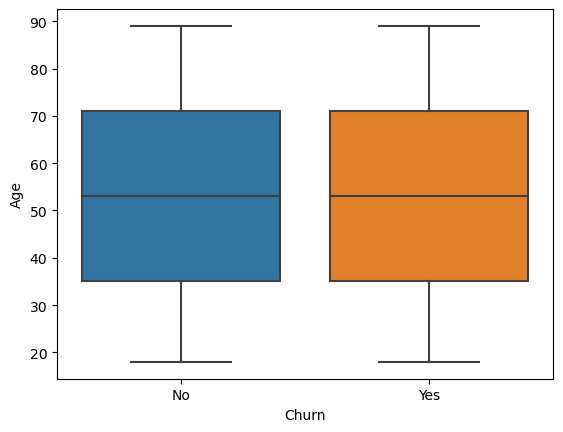

In [38]:
sns.boxplot(data=df, x="Churn", y="Age")

<AxesSubplot:xlabel='Churn', ylabel='Income'>

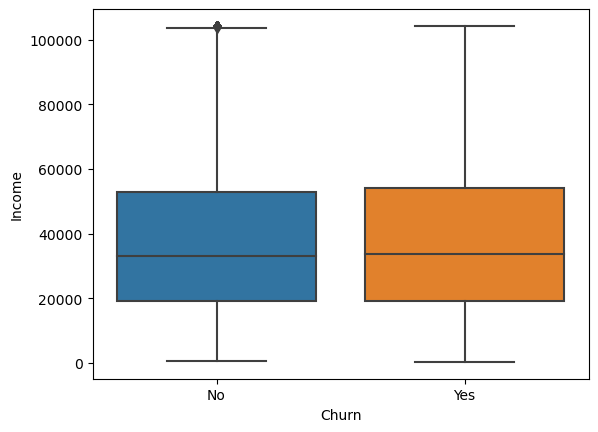

In [39]:
sns.boxplot(data=df, x="Churn", y="Income")

<AxesSubplot:xlabel='Churn', ylabel='Outage_sec_perweek'>

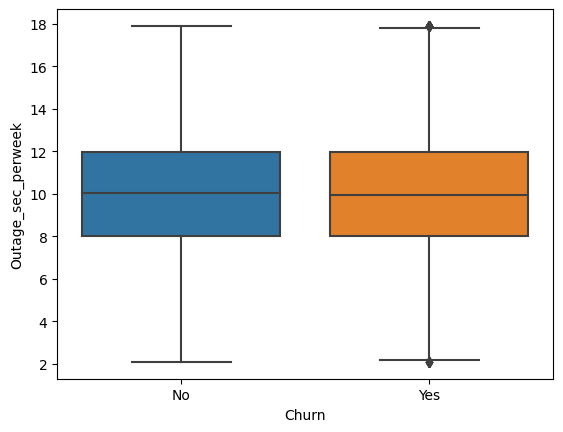

In [40]:
sns.boxplot(data=df, x="Churn", y="Outage_sec_perweek")

<AxesSubplot:xlabel='Churn', ylabel='Contacts'>

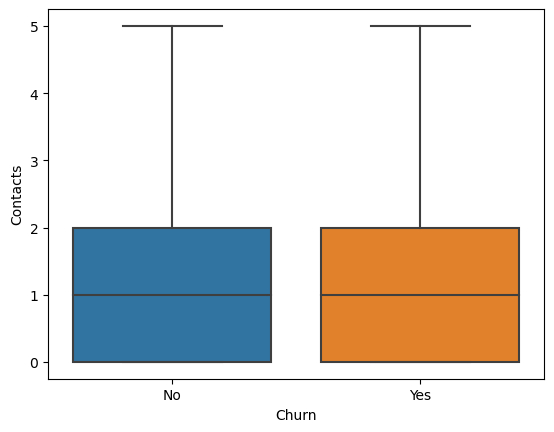

In [41]:
sns.boxplot(data=df, x="Churn", y="Contacts")

<AxesSubplot:xlabel='Churn', ylabel='Yearly_equip_failure'>

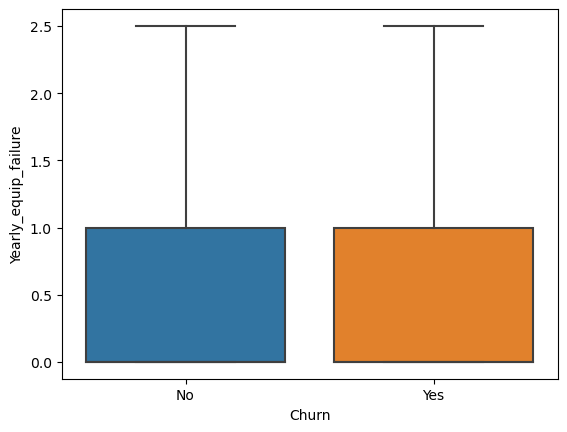

In [42]:
sns.boxplot(data=df, x="Churn", y="Yearly_equip_failure")

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

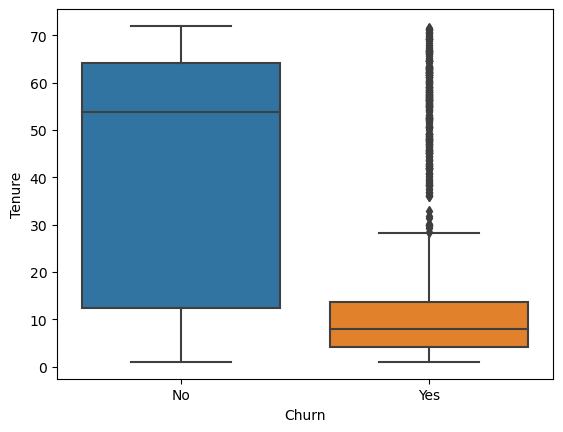

In [43]:
sns.boxplot(data=df, x="Churn", y="Tenure")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

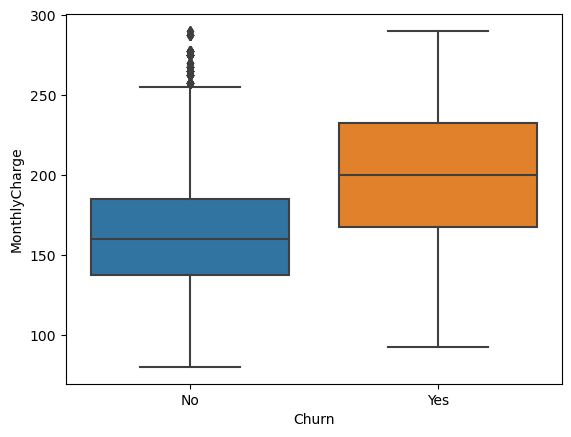

In [44]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharge")

In [45]:
#re-expression of categorical variables
#convert ordinal categorical to numerical

df['Churn']=df['Churn'].astype('category')
df['Churn']=df['Churn'].cat.codes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  int8   
 8   Outage_sec_perweek    10000 non-null  float64
 9   Contacts              10000 non-null  float64
 10  Yearly_equip_failure  10000 non-null  float64
 11  Contract              10000 non-null  object 
 12  InternetService       10000 non-null  object 
 13  PaymentMethod         10000 non-null  object 
 14  Tenure                10000 non-null  float64
 15  MonthlyCharge       

In [47]:
#utilizing get_dummies to convert nominal categorical to numerical

df= pd.get_dummies(df, columns=['Area', 'Marital', 'Gender', 'Contract',
                                    'InternetService', 'PaymentMethod'], prefix_sep=" " , drop_first=True)

In [48]:
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Area Suburban,Area Urban,Marital Married,Marital Never Married,Marital Separated,Marital Widowed,Gender Male,Gender Nonbinary,Contract One year,Contract Two Year,InternetService Fiber Optic,InternetService None,PaymentMethod Credit Card (automatic),PaymentMethod Electronic Check,PaymentMethod Mailed Check
0,38.0,0.0,68,28561.99,0,7.978323,0.0,1.0,6.795513,172.455519,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
1,10446.0,1.0,27,21704.77,1,11.699080,0.0,1.0,1.156681,242.632554,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3735.0,4.0,50,9609.57,0,10.752800,0.0,1.0,15.754144,159.947583,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,13863.0,1.0,48,18925.23,0,14.913540,2.0,0.0,17.087227,119.956840,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,11352.0,0.0,83,40074.19,1,8.147417,2.0,1.0,1.670972,149.948316,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [49]:
X=df[['Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check']]

vif_data = pd.DataFrame()
vif_data["Explanatory Variables"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data=vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                    Explanatory Variables    VIF
8                           MonthlyCharge  13.51
4                      Outage_sec_perweek  10.05
2                                     Age   6.69
3                                  Income   3.18
7                                  Tenure   2.63
22         PaymentMethod Electronic Check   2.40
19            InternetService Fiber Optic   2.37
1                                Children   2.00
5                                Contacts   1.99
9                           Area Suburban   1.95
10                             Area Urban   1.95
23             PaymentMethod Mailed Check   1.94
15                            Gender Male   1.91
13                      Marital Separated   1.88
14                        Marital Widowed   1.88
21  PaymentMethod Credit Card (automatic)   1.87
12                  Marital Never Married   1.85
11                        Marital Married   1.84
0                              Population   1.62
20                  

In [50]:
#dropping variables with high multiccollinearity
df.drop(['MonthlyCharge', 'Outage_sec_perweek'], axis=1, inplace=True)

In [51]:
df.describe()

,Population,Children,Age,Income,Churn,Contacts,Yearly_equip_failure,Tenure,Area Suburban,Area Urban,Marital Married,Marital Never Married,Marital Separated,Marital Widowed,Gender Male,Gender Nonbinary,Contract One year,Contract Two Year,InternetService Fiber Optic,InternetService None,PaymentMethod Credit Card (automatic),PaymentMethod Electronic Check,PaymentMethod Mailed Check
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,8429.197300,2.038650,53.078400,39005.334061,0.265000,0.993100,0.392300,34.526188,0.334600,0.332700,0.191100,0.195600,0.201400,0.202700,0.474400,0.023100,0.210200,0.244200,0.440800,0.212900,0.208300,0.339800,0.22900
std,10611.340884,1.997306,20.698882,25578.172567,0.441355,0.983132,0.612771,26.443063,0.471874,0.471204,0.393187,0.396682,0.401066,0.402031,0.499369,0.150229,0.407471,0.429633,0.496508,0.409378,0.406113,0.473665,0.42021
min,0.000000,0.000000,18.000000,348.670000,0.000000,0.000000,0.000000,1.000259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,738.000000,0.000000,35.000000,19224.717500,0.000000,0.000000,0.000000,7.917694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2910.500000,1.000000,53.000000,33170.605000,0.000000,1.000000,0.000000,35.430507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,13168.000000,3.000000,71.000000,53246.170000,1.000000,2.000000,1.000000,61.479795,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000
max,31813.000000,7.500000,89.000000,104278.348750,1.000000,5.000000,2.500000,71.999280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [52]:
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Churn', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Area Suburban', 'Area Urban',
       'Marital Married', 'Marital Never Married', 'Marital Separated',
       'Marital Widowed', 'Gender Male', 'Gender Nonbinary',
       'Contract One year', 'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check'],
      dtype='object')

In [53]:
# logistic regression model
df['const']=1
y= df['Churn']
X= df[['Population', 'Children', 'Age', 'Income',
       'Contacts', 'Yearly_equip_failure', 'Tenure',
       'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check','const']]
log_model = sm.Logit(y,X)
results = log_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.386127
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3322
Time:                        00:29:11   Log-Likelihood:                -3861.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Population                            -5.917e-07   2.6

In [54]:
y= df['Churn']
X= df[['Population', 'Children', 'Age', 'Income',
       'Contacts', 'Yearly_equip_failure', 'Tenure',
       'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check','const']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [56]:
scaler = RobustScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test= scaler.transform(X_test)

In [59]:
log_r= LogisticRegression(random_state=0).fit(X_train, y_train)

In [60]:
y_pred= log_r.predict(X_test)

In [61]:
log_r.score(X_train, y_train)

0.8227142857142857

In [62]:
confusion_matrix(y_test, y_pred)

array([[1949,  252],
       [ 312,  487]], dtype=int64)

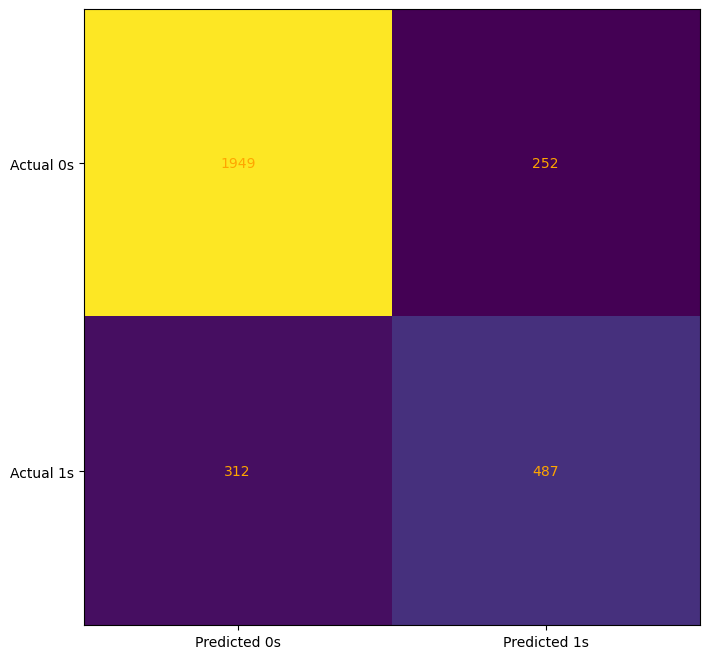

In [63]:
matrix_i = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix_i)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix_i[i, j], ha='center', va='center', color='orange')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2201
           1       0.66      0.61      0.63       799

    accuracy                           0.81      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.81      0.81      0.81      3000



In [65]:
#reduced model via backward stepwise elmination with p-values less than 0.05

df['const']=1
y= df['Churn']
X= df[['Tenure', 'Contract Two Year', 'Contract One year', 'Gender Male',
       'InternetService Fiber Optic', 'InternetService None',
       'PaymentMethod Electronic Check', 'const']]
log_model_red = sm.Logit(y,X)
redu_results = log_model_red.fit()
print(redu_results.summary())

Optimization terminated successfully.
         Current function value: 0.387005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3307
Time:                        00:36:40   Log-Likelihood:                -3870.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Tenure                            -0.0626      0.001    -42.035     

In [66]:
y= df['Churn']
X= df[['Tenure', 'Contract Two Year', 'Contract One year', 'Gender Male',
       'InternetService Fiber Optic', 'InternetService None',
       'PaymentMethod Electronic Check', 'const']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [68]:
scaler = RobustScaler()

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test= scaler.transform(X_test)

In [71]:
logr= LogisticRegression(random_state=0).fit(X_train, y_train)

In [72]:
logr.score(X_test, y_test)

0.8133333333333334

In [73]:
y_predr= logr.predict(X_test)

In [74]:
confusion_matrix(y_test, y_predr)

array([[1948,  253],
       [ 307,  492]], dtype=int64)

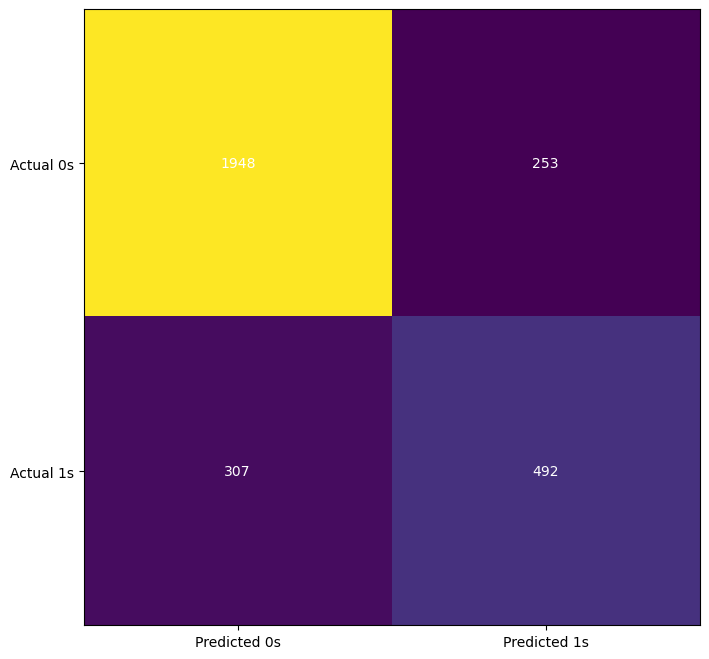

In [75]:
matrix = confusion_matrix(y_test, y_predr)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='white')
plt.show()

In [76]:
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2201
           1       0.66      0.62      0.64       799

    accuracy                           0.81      3000
   macro avg       0.76      0.75      0.76      3000
weighted avg       0.81      0.81      0.81      3000



In [77]:
df.to_csv(r'AFCodeD208Task2_clean.csv')